In [2]:
import sys
import regions
import numpy as np
import PIL

import importlib as imp

from regions import Regions

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.visualization import simple_norm

import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u


from spectral_cube import SpectralCube
from spectral_cube import Projection

import regions

from astropy.visualization.wcsaxes import add_scalebar
from astropy.visualization.wcsaxes import add_beam

import random as rand

from astropy.table import Table
import pandas as pd

from matplotlib.patches import Rectangle

from pvextractor import extract_pv_slice, Path


In [3]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [4]:
cd ..

/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament


In [5]:
import moment_maker as mm
import cutout_manager as cm

In [11]:
plt.style.use('dark_background')

# Maser PV Diagram

In [12]:
whole_pv_CS = fits.open('/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_PV_max.fits')

In [13]:
maser_pv = Table.read('/orange/adamginsburg/ACES/upload/SiO_Masers/ACES_SiO_maser_position_velocity.csv')

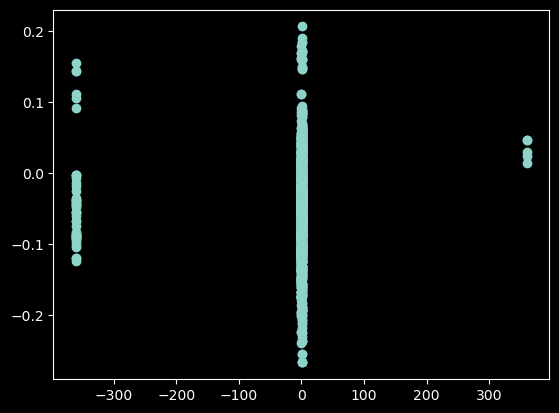

In [14]:
plt.scatter((maser_pv['GLON (deg)']*u.deg).to(u.rad).to(u.deg), maser_pv['GLAT (deg)'])

In [15]:
maser_pv['velocity (m/s)'] = (maser_pv['velocity (km/s)']*u.km/u.s).to(u.m/u.s)

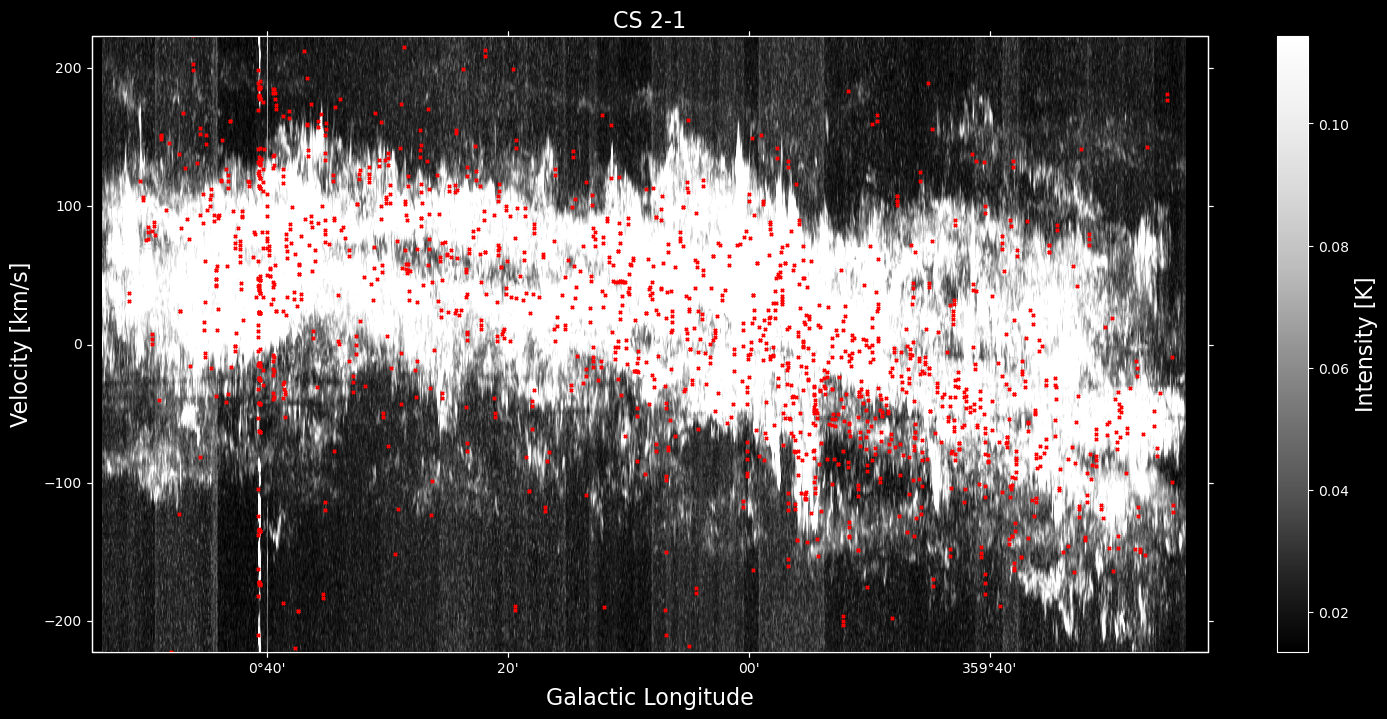

In [16]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(111, projection=WCS(whole_pv_CS[0].header))
norm = simple_norm(whole_pv_CS[0].data, stretch='linear', min_percent=1, max_percent=80)
im = ax.imshow(whole_pv_CS[0].data, cmap='Greys_r', norm=norm)
right, left = ax.get_xlim()
top, bottom = ax.get_ylim()

ax.scatter(maser_pv['GLON (deg)'], maser_pv['velocity (m/s)'].value, color='red', marker='x', s=5, transform=ax.get_transform('world'))

ax.set_xlim(right, left)
ax.set_ylim(top, bottom)


ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_xlabel('Galactic Longitude', fontsize=16)
ax.set_ylabel('Velocity [km/s]', fontsize=16)
ax.set_title('CS 2-1', fontsize=16)

ax.set_aspect('auto')

ax.set_facecolor('k')

cbar = plt.colorbar(im)
cbar.set_label('Intensity [K]', fontsize=16)


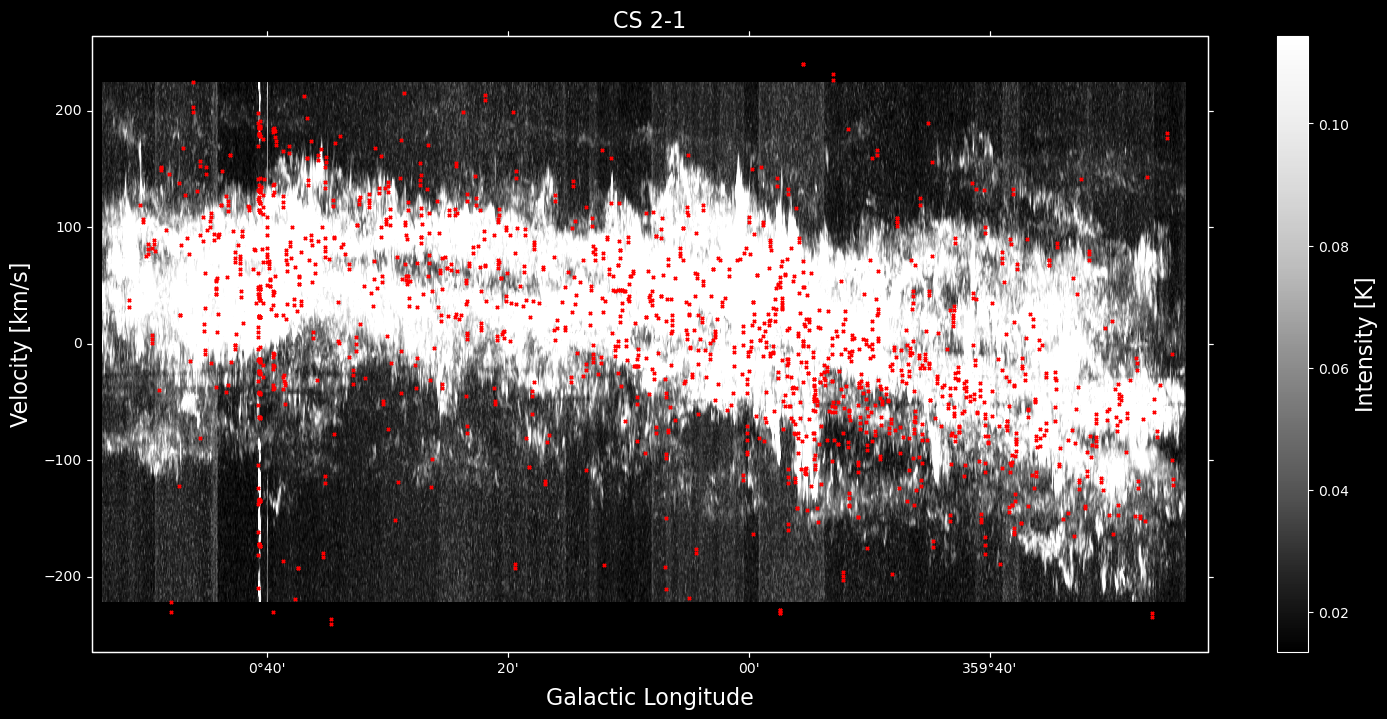

In [57]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(111, projection=WCS(whole_pv_CS[0].header))
norm = simple_norm(whole_pv_CS[0].data, stretch='linear', min_percent=1, max_percent=80)
im = ax.imshow(whole_pv_CS[0].data, cmap='Greys_r', norm=norm)
right, left = ax.get_xlim()
top, bottom = ax.get_ylim()

ax.scatter(maser_pv['GLON (deg)'], maser_pv['velocity (m/s)'].value, color='red', marker='x', s=5, transform=ax.get_transform('world'))

ax.set_xlim(right, left)
#ax.set_ylim(top, bottom)


ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_xlabel('Galactic Longitude', fontsize=16)
ax.set_ylabel('Velocity [km/s]', fontsize=16)
ax.set_title('CS 2-1', fontsize=16)

ax.set_aspect('auto')

ax.set_facecolor('k')

cbar = plt.colorbar(im)
cbar.set_label('Intensity [K]', fontsize=16)


# Position Comparison

In [45]:
maser_positions = SkyCoord(maser_pv['GLON (deg)'], maser_pv['GLAT (deg)'], unit=u.deg, frame='galactic')

In [19]:
fn_405 = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'

In [20]:
hdu = fits.open(fn_405)

In [34]:
data = hdu['SCI'].data
data[data==0] = np.nan
wcs = WCS(hdu['SCI'].header)

In [36]:
pos_cloudc1 = SkyCoord('17:46:21.3048683891', '-28:35:33.1211282499', unit=(u.hourangle, u.deg))


In [53]:
reg = regions.RectangleSkyRegion(center=pos_cloudc1, width=2.5*u.arcmin, height=7.5*u.arcmin, angle=5*u.deg)
#reg.to_pixel(wcs).plot(ax=ax, edgecolor='red', facecolor='none')

maser_positions_in = maser_positions[reg.contains(maser_positions, wcs)]

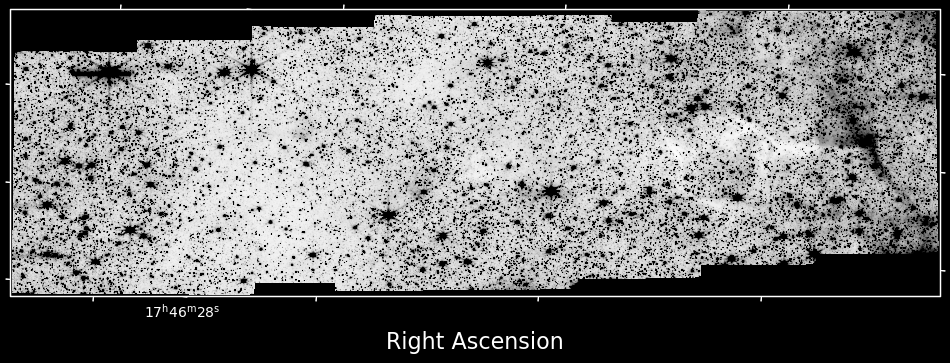

In [54]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(111, projection=wcs)
ax.imshow(data, cmap='Greys', vmin=0, vmax=50)

#ax.scatter(maser_positions_in.icrs.ra, maser_positions_in.icrs.dec, color='red', marker='x', s=20, transform=ax.get_transform('world'))

ax.set_xlabel('Right Ascension', fontsize=16)
ax.set_ylabel('Declination', fontsize=16)

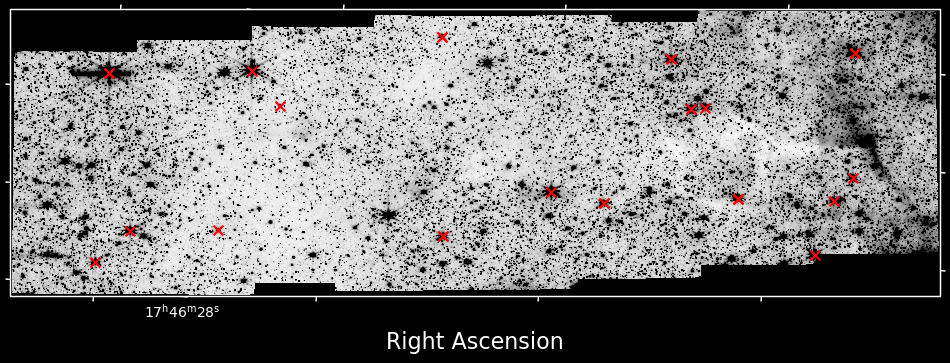

In [56]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(111, projection=wcs)
ax.imshow(data, cmap='Greys', vmin=0, vmax=50)

ax.scatter(maser_positions_in.icrs.ra, maser_positions_in.icrs.dec, color='red', marker='x', s=50, transform=ax.get_transform('world'))

ax.set_xlabel('Right Ascension', fontsize=16)
ax.set_ylabel('Declination', fontsize=16)